In [1]:
import os
import numpy as np
import pandas as pd
import geopandas as gpd
import pysal
import seaborn
import contextily
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

# USA PPA

In [49]:
in_file = os.path.join('..','in','datacentermap.csv')
dc_df = pd.read_csv(in_file)

us_dc = dc_df[dc_df['country'] == 'USA']

# Create a GeoDataFrame
us_dc_gdf = gpd.GeoDataFrame(us_dc, geometry=gpd.points_from_xy(us_dc.longitude, us_dc.latitude))

# Define or identify the coordinate reference system (CRS)
# For the United States, you can use EPSG:4326 (WGS 84) which is commonly used for latitude and longitude coordinates
us_dc_gdf.crs = "EPSG:4326"

us_dc_gdf

,name,id,link_profile,latitude,longitude,address,postal,city,state,country,geometry
3,1 Ramland,5212,https://www.datacentermap.com/usa/new-york/new...,41.034512,-73.975840,1 Ramland Rd,10962,Orangeburg,New York,USA,POINT (-73.97584 41.03451)
5,1001 Texas Data Center,8680,https://www.datacentermap.com/usa/texas/housto...,29.760061,-95.362102,1001 Texas Ave.,77002,Houston,Texas,USA,POINT (-95.36210 29.76006)
7,101 Aquila Way (ATL11),982,https://www.datacentermap.com/usa/georgia/atla...,33.746556,-84.580250,101 Aquila Way,30122,Austell,Georgia,USA,POINT (-84.58025 33.74656)
8,"1010 Technology Center, Inc",4642,https://www.datacentermap.com/usa/michigan/alp...,45.061679,-83.432753,1010 US 23 N,49707,Alpena,Michigan,USA,POINT (-83.43275 45.06168)
9,Long Island Interconnect,4289,https://www.datacentermap.com/usa/new-york/lon...,40.755477,-73.557916,1025 Old Country Road,11590,Westbury,New York,USA,POINT (-73.55792 40.75548)
...,...,...,...,...,...,...,...,...,...,...,...
6549,DataBank LGA1 - Downtown New York City,2576,https://www.datacentermap.com/usa/new-york/new...,40.717946,-74.008929,60 Hudson St,10013,New York,New York,USA,POINT (-74.00893 40.71795)
6550,DataBank LGA2 - Downtown New York City,2577,https://www.datacentermap.com/usa/new-york/new...,40.741089,-74.001526,111 8th Ave,10011,Manhattan,New York,USA,POINT (-74.00153 40.74109)
6551,DataBank DFW6 - Dallas Love Field,4958,https://www.datacentermap.com/usa/texas/dallas...,32.837604,-96.865387,8600 Harry Hines Blvd,75235,Dallas,Texas,USA,POINT (-96.86539 32.83760)
6552,DataBank EWR1 - Downtown Newark,2578,https://www.datacentermap.com/usa/new-jersey/n...,40.736729,-74.173286,165 Halsey St,07102,Newark,New Jersey,USA,POINT (-74.17329 40.73673)


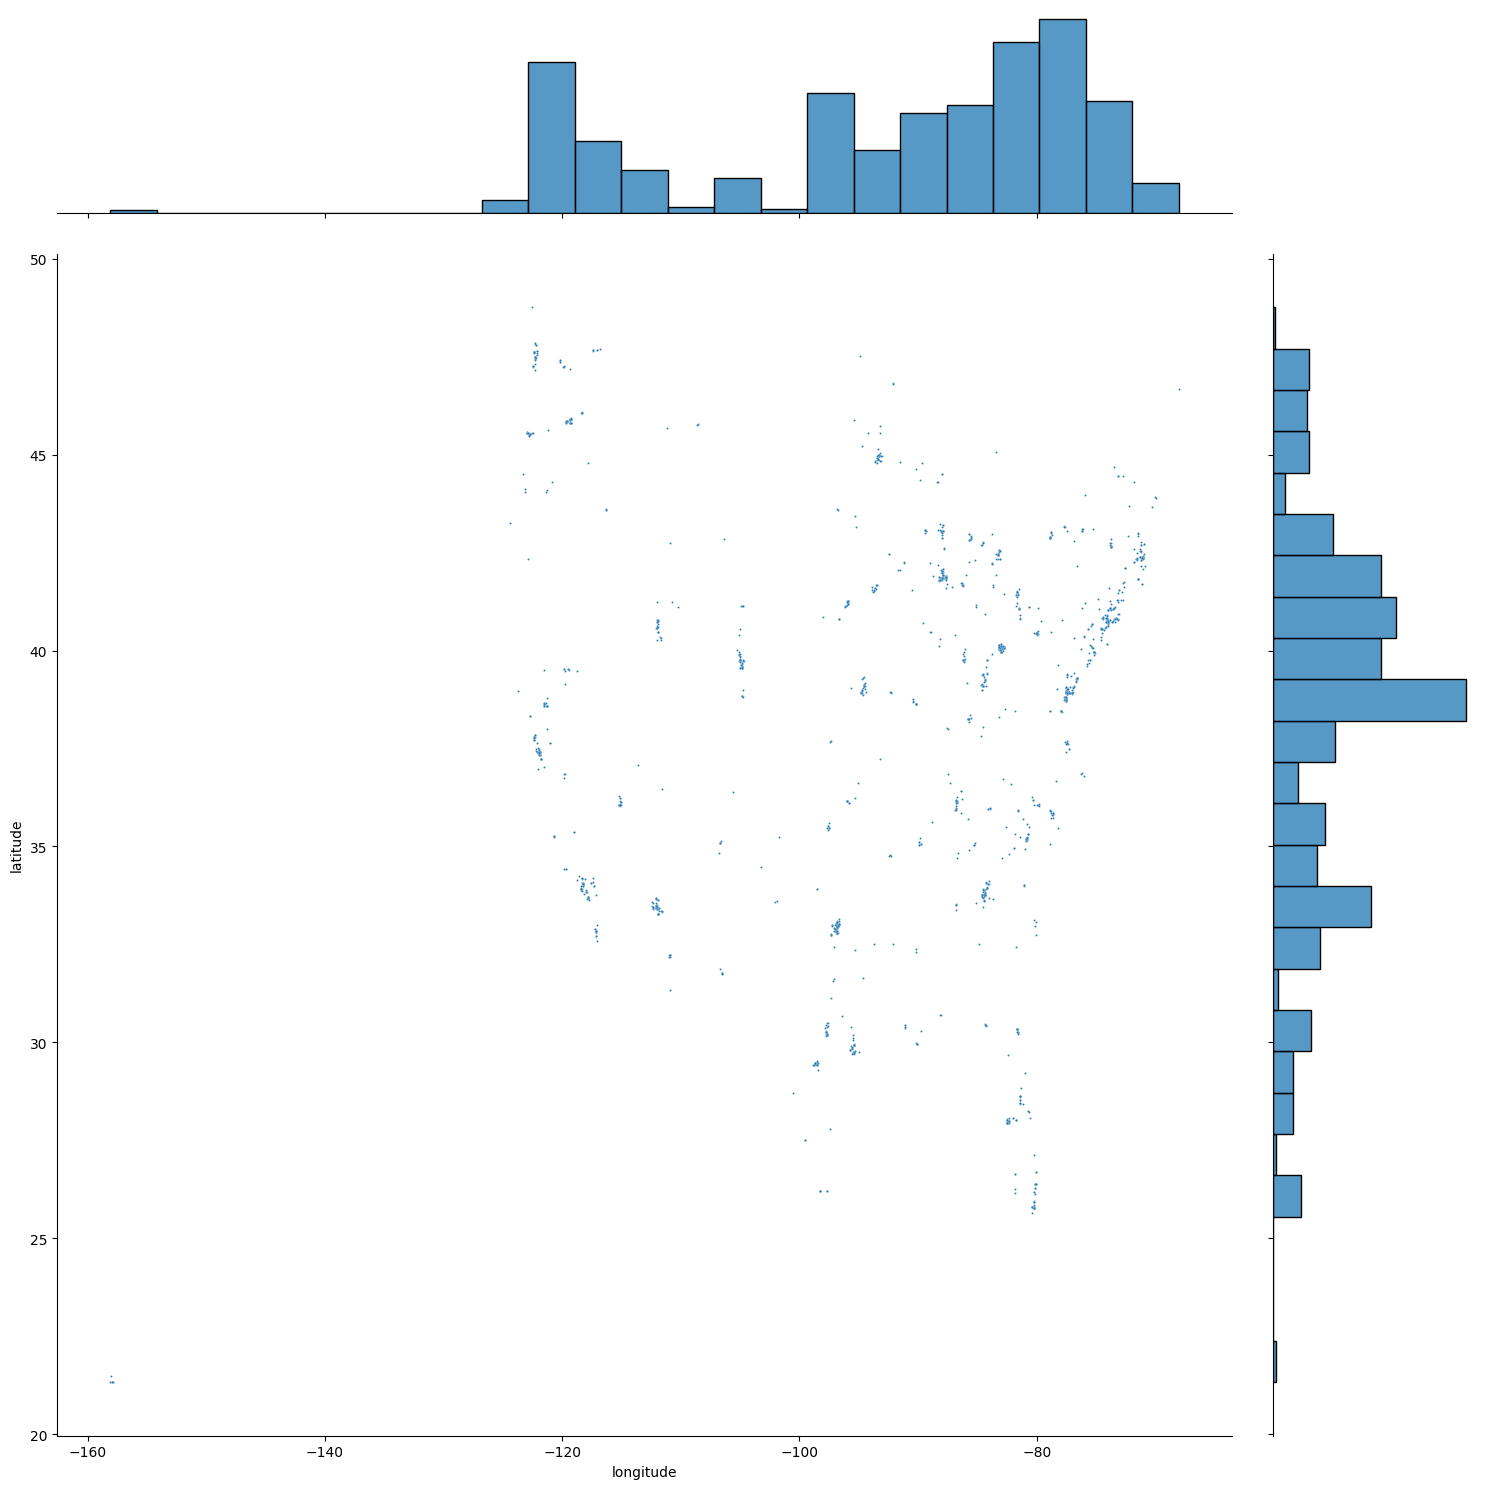

In [53]:
# Generate scatter plot
seaborn.jointplot(height=15, x="longitude", y="latitude", data=us_dc_gdf, s=2);

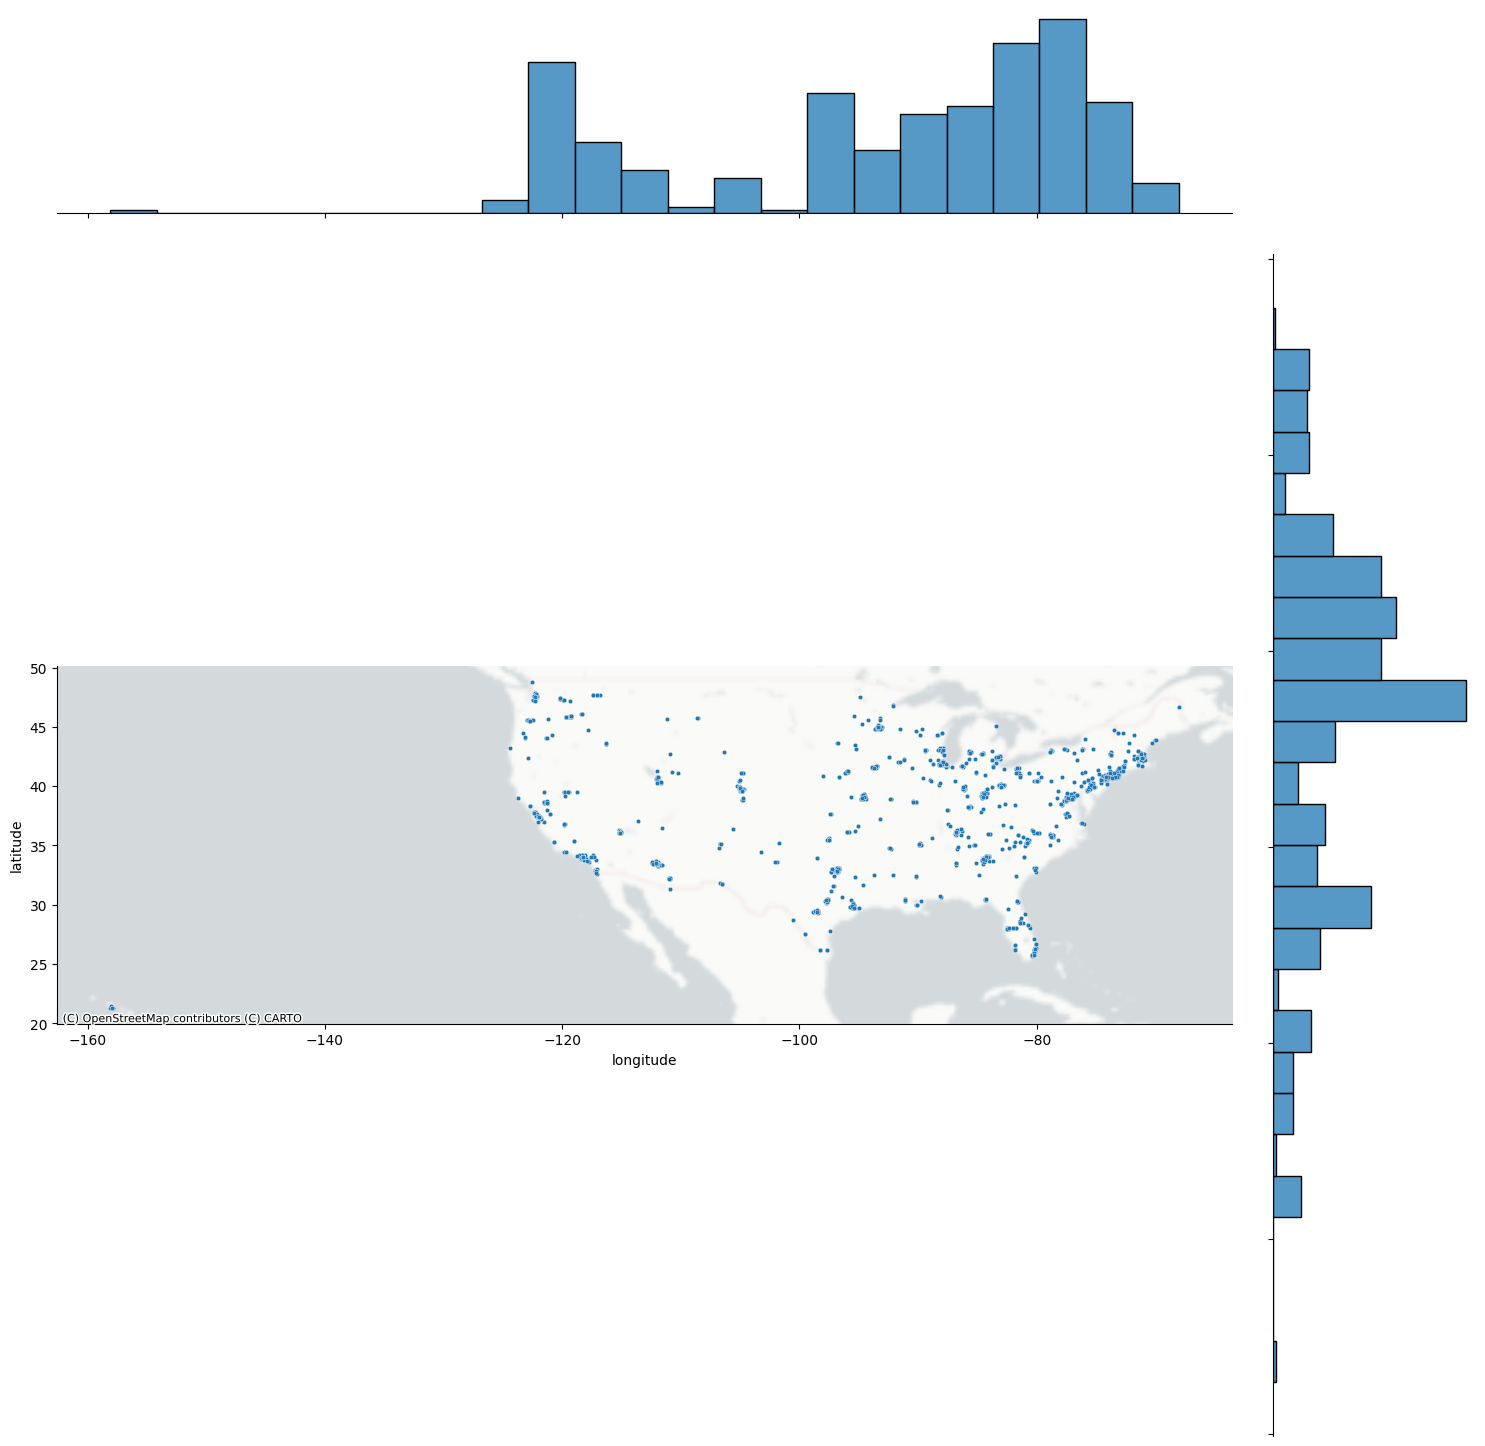

In [54]:
# Generate scatter plot
joint_axes = seaborn.jointplot(height=15,
    x="longitude", y="latitude", data=us_dc_gdf, s=10
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

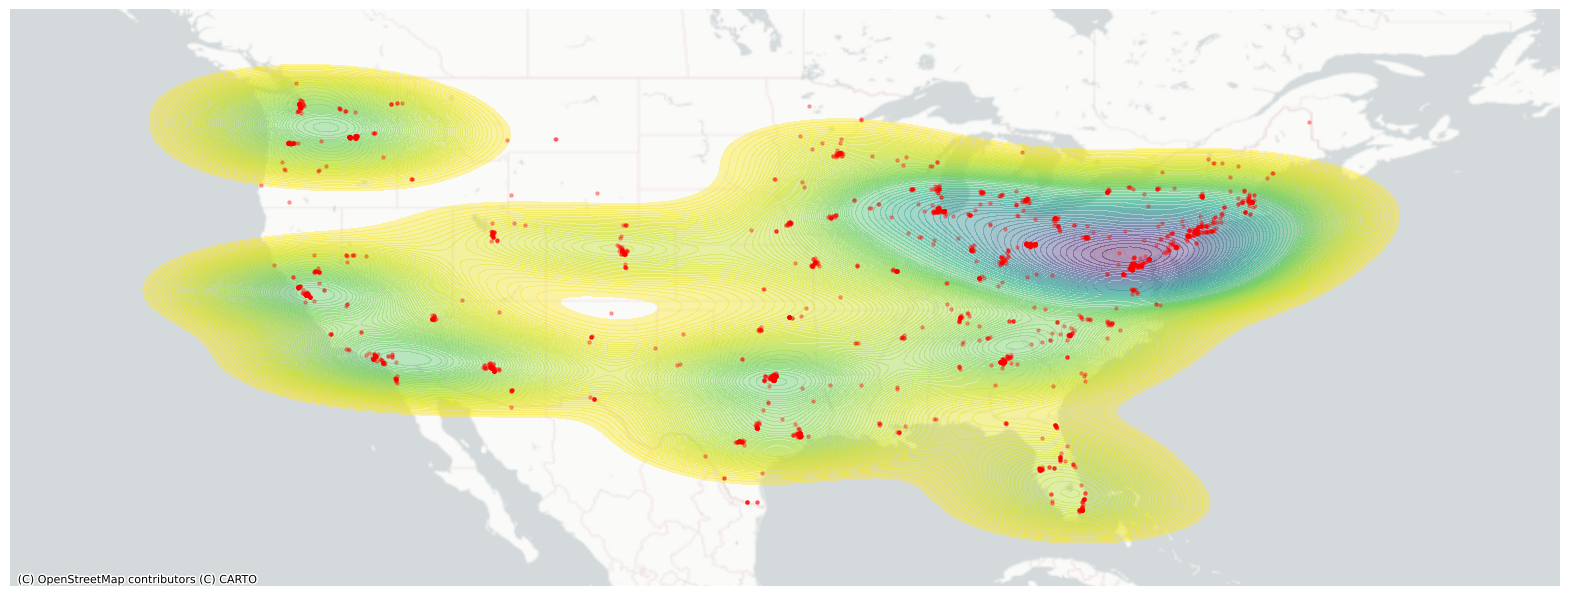

In [62]:
# create a version without hawaii
us_dc_gdf_filtered = us_dc_gdf[us_dc_gdf['state'] != 'Hawaii']

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))

# Generate and add KDE with a shading of 50 gradients, coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x="longitude",
    y="latitude",
    data=us_dc_gdf_filtered,
    n_levels=100,
    fill=True,
    alpha=0.4,
    cmap="viridis_r",
    ax=ax
)

# Add the points themselves to the plot
ax.scatter(
    us_dc_gdf_filtered['longitude'],
    us_dc_gdf_filtered['latitude'],
    s=5,  # Size of points
    c='red',  # Color of points
    alpha=0.3  # Transparency of points
)

# Add basemap
contextily.add_basemap(
    ax=ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
)

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()


In [57]:
us_dc_gdf

,name,id,link_profile,latitude,longitude,address,postal,city,state,country,geometry
3,1 Ramland,5212,https://www.datacentermap.com/usa/new-york/new...,41.034512,-73.975840,1 Ramland Rd,10962,Orangeburg,New York,USA,POINT (-73.97584 41.03451)
5,1001 Texas Data Center,8680,https://www.datacentermap.com/usa/texas/housto...,29.760061,-95.362102,1001 Texas Ave.,77002,Houston,Texas,USA,POINT (-95.36210 29.76006)
7,101 Aquila Way (ATL11),982,https://www.datacentermap.com/usa/georgia/atla...,33.746556,-84.580250,101 Aquila Way,30122,Austell,Georgia,USA,POINT (-84.58025 33.74656)
8,"1010 Technology Center, Inc",4642,https://www.datacentermap.com/usa/michigan/alp...,45.061679,-83.432753,1010 US 23 N,49707,Alpena,Michigan,USA,POINT (-83.43275 45.06168)
9,Long Island Interconnect,4289,https://www.datacentermap.com/usa/new-york/lon...,40.755477,-73.557916,1025 Old Country Road,11590,Westbury,New York,USA,POINT (-73.55792 40.75548)
...,...,...,...,...,...,...,...,...,...,...,...
6549,DataBank LGA1 - Downtown New York City,2576,https://www.datacentermap.com/usa/new-york/new...,40.717946,-74.008929,60 Hudson St,10013,New York,New York,USA,POINT (-74.00893 40.71795)
6550,DataBank LGA2 - Downtown New York City,2577,https://www.datacentermap.com/usa/new-york/new...,40.741089,-74.001526,111 8th Ave,10011,Manhattan,New York,USA,POINT (-74.00153 40.74109)
6551,DataBank DFW6 - Dallas Love Field,4958,https://www.datacentermap.com/usa/texas/dallas...,32.837604,-96.865387,8600 Harry Hines Blvd,75235,Dallas,Texas,USA,POINT (-96.86539 32.83760)
6552,DataBank EWR1 - Downtown Newark,2578,https://www.datacentermap.com/usa/new-jersey/n...,40.736729,-74.173286,165 Halsey St,07102,Newark,New Jersey,USA,POINT (-74.17329 40.73673)


# Virginia PPA

In [16]:
in_file = os.path.join('..','in','datacentermap.csv')
dc_df = pd.read_csv(in_file)

virginia_dc = dc_df[dc_df['state'] == 'Virginia']

# Create a GeoDataFrame
virginia_dc_gdf = gpd.GeoDataFrame(virginia_dc, geometry=gpd.points_from_xy(virginia_dc.longitude, virginia_dc.latitude))

# Define or identify the coordinate reference system (CRS)
# For the United States, you can use EPSG:4326 (WGS 84) which is commonly used for latitude and longitude coordinates
virginia_dc_gdf.crs = "EPSG:4326"

virginia_dc_gdf

,name,id,link_profile,latitude,longitude,address,postal,city,state,country,geometry
27,CoreSite Reston (VA2),1036,https://www.datacentermap.com/usa/virginia/res...,38.949783,-77.366061,12100 Sunrise Valley Drive,20190,Reston,Virginia,USA,POINT (-77.36606 38.94978)
54,1780 Business Center Drive (VA3),7758,https://www.datacentermap.com/usa/virginia/ash...,38.948482,-77.327202,1780 Business Center Drive,20190,Reston,Virginia,USA,POINT (-77.32720 38.94848)
55,1807 Michael Faraday,6408,https://www.datacentermap.com/usa/virginia/res...,38.948869,-77.329428,1807 Michael Faraday Ct,20190,Reston,Virginia,USA,POINT (-77.32943 38.94887)
75,21625 Gresham Drive (ACC7),7912,https://www.datacentermap.com/usa/virginia/ash...,39.017522,-77.465676,21625 Gresham Drive,20147,Ashburn,Virginia,USA,POINT (-77.46568 39.01752)
77,"22124 Broderick Drive, Bldg R (IAD42)",8668,https://www.datacentermap.com/usa/virginia/ash...,39.005589,-77.449503,22124 Broderick Drive (Bldg R),20147,Ashburn,Virginia,USA,POINT (-77.44950 39.00559)
...,...,...,...,...,...,...,...,...,...,...,...
6272,Verizon Manassas,10299,https://www.datacentermap.com/usa/virginia/man...,38.804825,-77.512137,7777 Infantry Ridge,20109,Manassas,Virginia,USA,POINT (-77.51214 38.80483)
6315,Virtustream Vienna,3228,https://www.datacentermap.com/usa/virginia/vie...,38.927740,-77.248597,8619 Westwood Center Drive,22182,Vienna,Virginia,USA,POINT (-77.24860 38.92774)
6427,Windstream Ashburn,10230,https://www.datacentermap.com/usa/virginia/ash...,39.014974,-77.474051,44200 Waxpool Rd,20147,Ashburn,Virginia,USA,POINT (-77.47405 39.01497)
6452,Windstream Sterling,10231,https://www.datacentermap.com/usa/virginia/ste...,39.023753,-77.392256,21376 Potomac View Rd,20164,Sterling,Virginia,USA,POINT (-77.39226 39.02375)


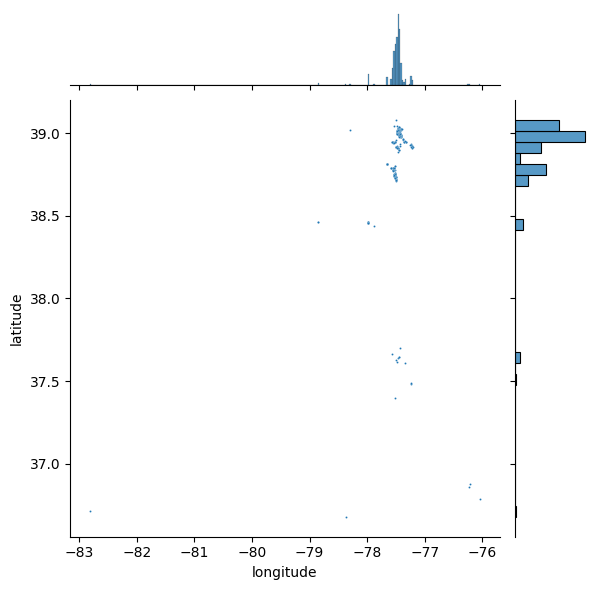

In [17]:
# Generate scatter plot
seaborn.jointplot(x="longitude", y="latitude", data=virginia_dc_gdf, s=2);

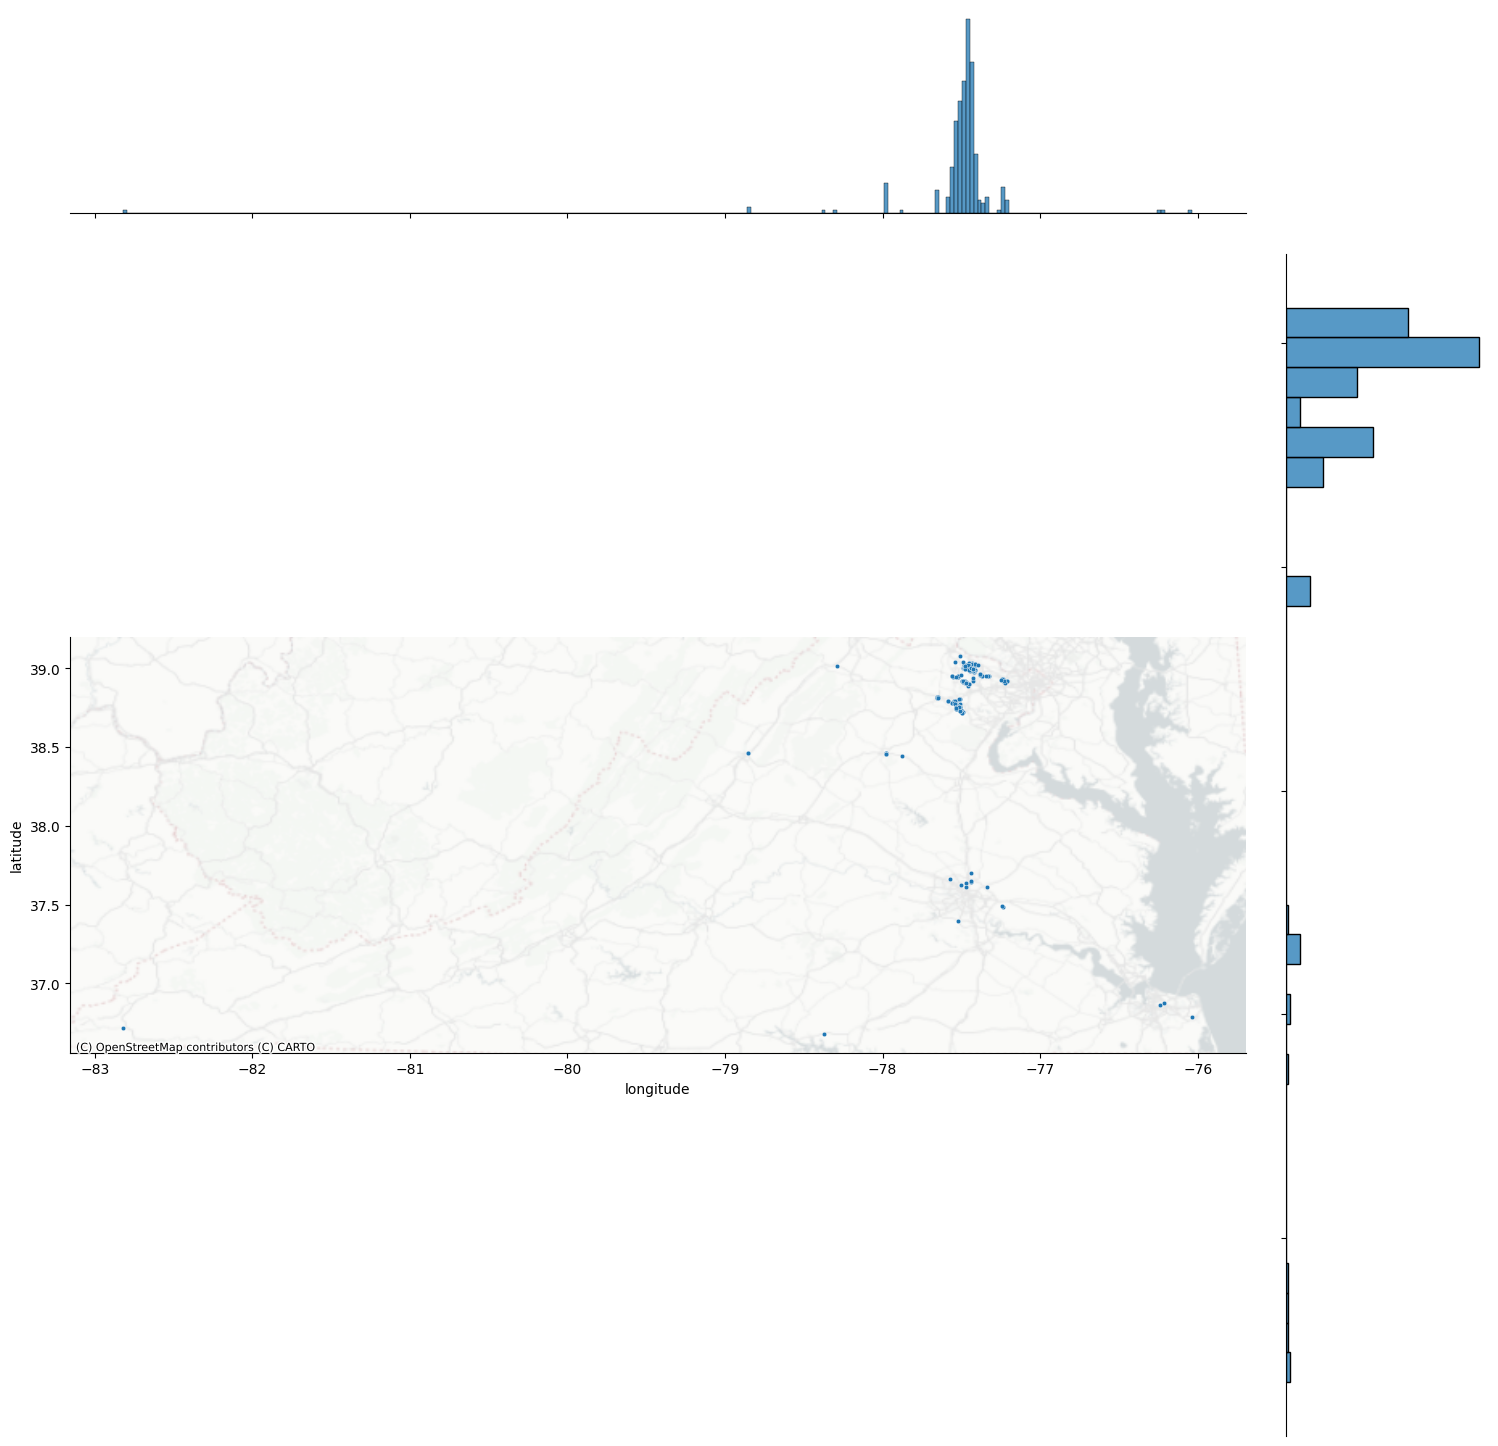

In [40]:
# Generate scatter plot
joint_axes = seaborn.jointplot(height=15,
    x="longitude", y="latitude", data=virginia_dc_gdf, s=10
)
contextily.add_basemap(
    joint_axes.ax_joint,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
);

c:\Users\Albin\AppData\Local\Programs\Python\Python311\Lib\site-packages\contextily\tile.py:623: UserWarning: The inferred zoom level of 24 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


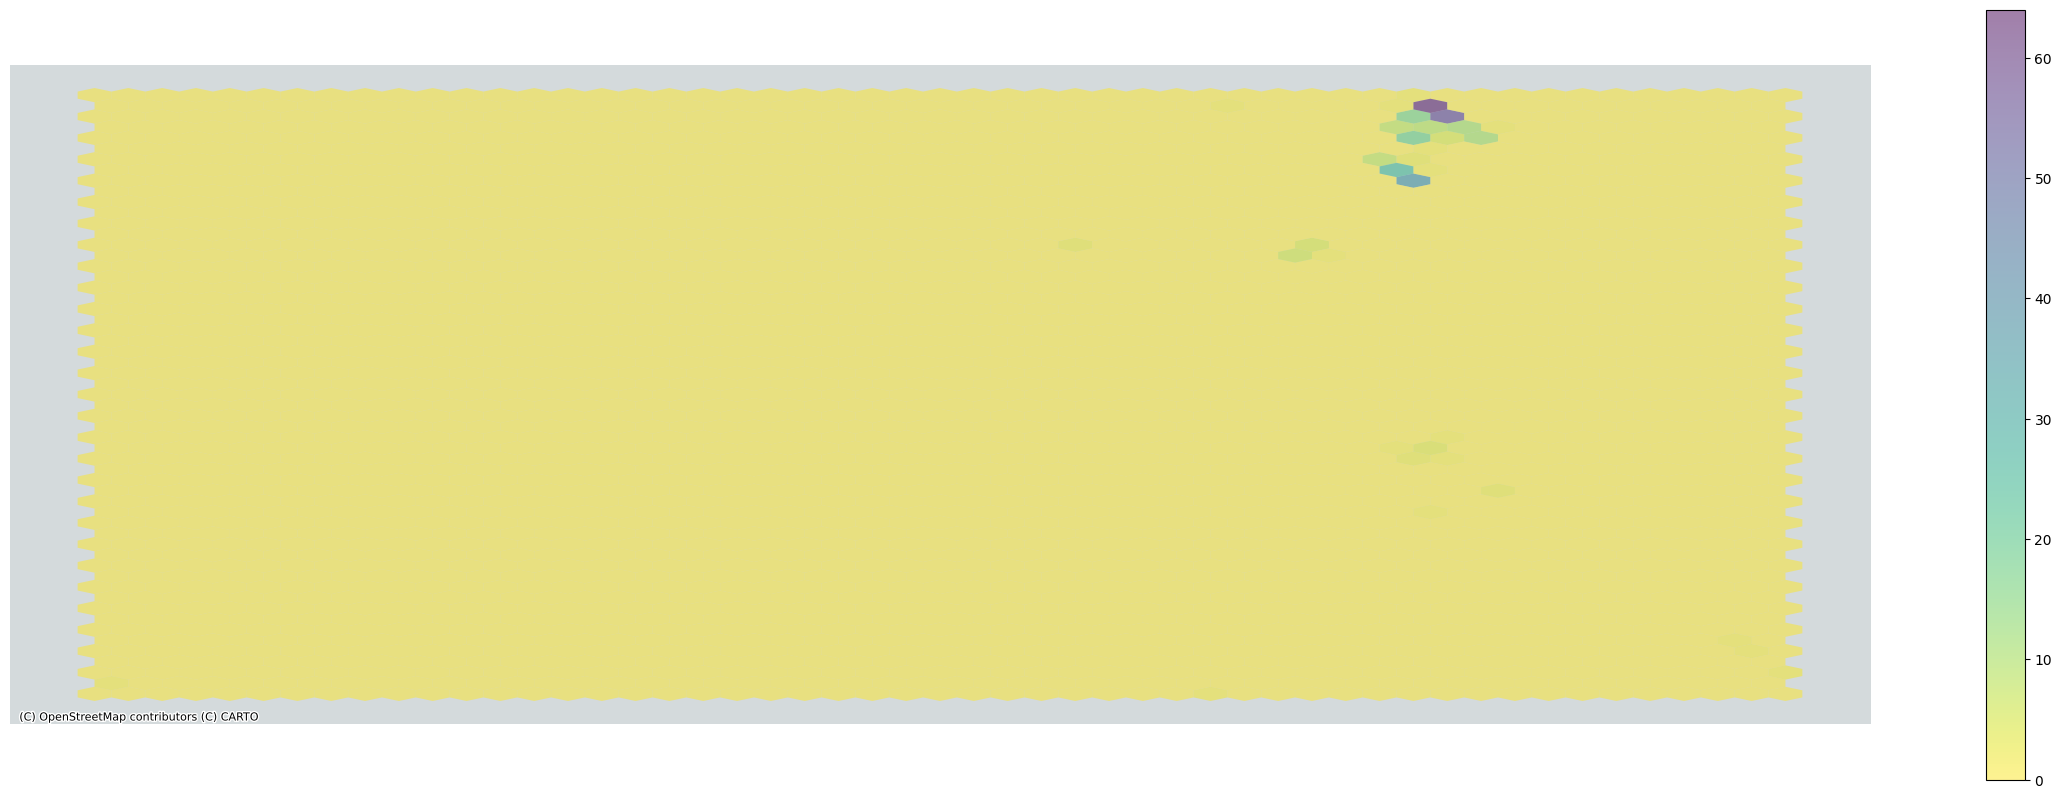

In [39]:
# Set up figure and axis
f, ax = plt.subplots(1, figsize=(30, 10))
# Generate and add hexbin with 50 hexagons in each
# dimension, no borderlines, half transparency,
# and the reverse viridis colormap
hb = ax.hexbin(
    virginia_dc_gdf["longitude"],
    virginia_dc_gdf["latitude"],
    gridsize=50,
    linewidths=0,
    alpha=0.5,
    cmap="viridis_r",
)
# Add basemap
contextily.add_basemap(
    ax=ax, source=contextily.providers.CartoDB.PositronNoLabels,
)
# Add colorbar
plt.colorbar(hb)
# Remove axes
ax.set_axis_off()

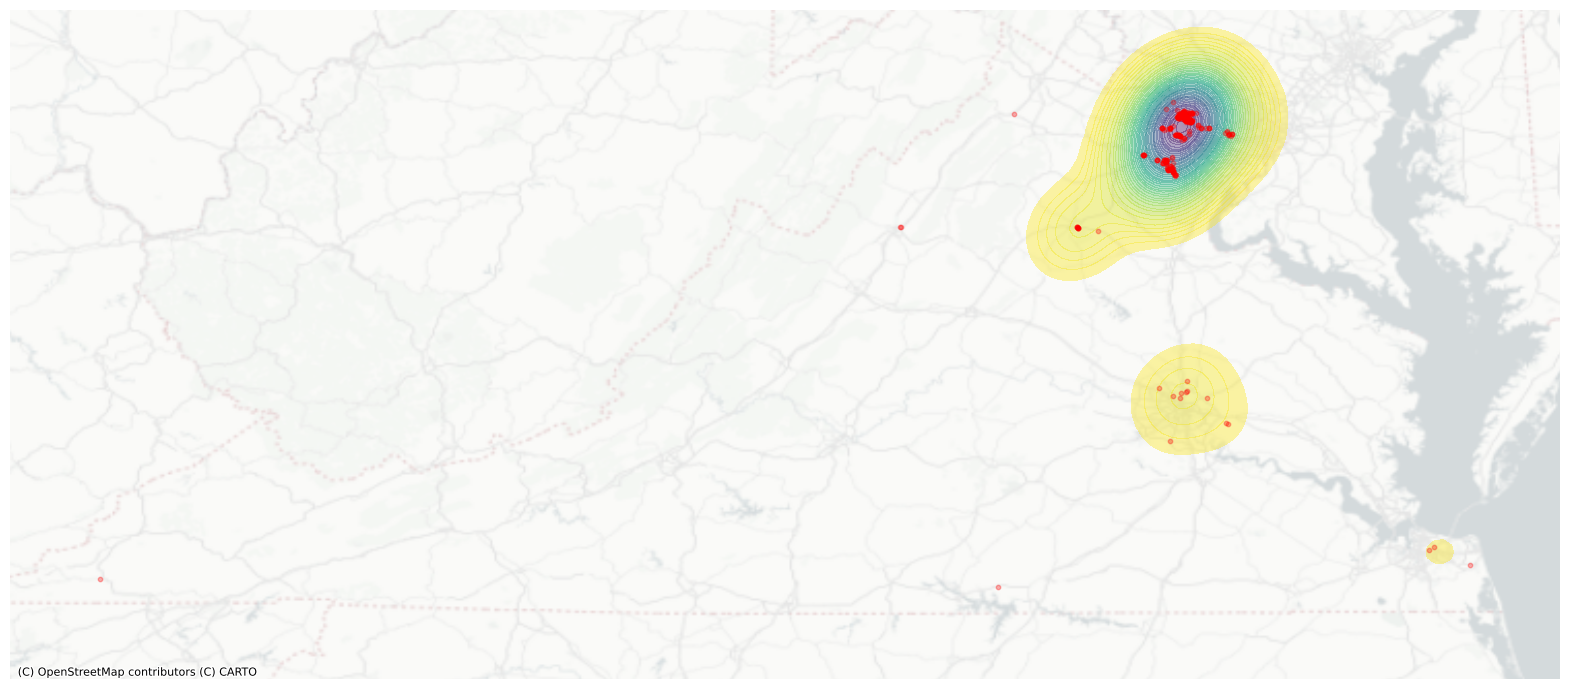

In [48]:
# Assume virginia_dc_gdf is your GeoDataFrame containing 'longitude' and 'latitude' columns

# Set up figure and axis
f, ax = plt.subplots(1, figsize=(20, 10))

# Generate and add KDE with a shading of 50 gradients, coloured contours, 75% of transparency,
# and the reverse viridis colormap
seaborn.kdeplot(
    x="longitude",
    y="latitude",
    data=virginia_dc_gdf,
    n_levels=50,
    fill=True,
    alpha=0.4,
    cmap="viridis_r",
    ax=ax
)

# Add the points themselves to the plot
ax.scatter(
    virginia_dc_gdf['longitude'],
    virginia_dc_gdf['latitude'],
    s=10,  # Size of points
    c='red',  # Color of points
    alpha=0.3  # Transparency of points
)

# Add basemap
contextily.add_basemap(
    ax=ax,
    crs="EPSG:4326",
    source=contextily.providers.CartoDB.PositronNoLabels,
)

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()
